# Exploratory Data Analysis: Airbnb Listings - New York

This project involves performing an exploratory data analysis (EDA) on Airbnb listings data for a particular city. The analysis will focus on factors such as price, availability, location, and property type to identify trends and patterns in the demand for Airbnb listings in the city. The project will include data cleaning, visualization, and statistical analysis using tools such as Python and Jupyter Notebook.

## Importing libraries, loading dataset and simple exploration

In [2]:
#importing necessery libraries for future analysis of the dataset
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
import seaborn as sns
import plotly.express as px
import os as os
import sys as sys
plt.style.use('ggplot')
pd.set_option('display.max_columns', 200)
#import ydata_profiling as pp
#from ydata_profiling import ProfileReport   ##create a profile report for listings.csv

In [3]:
df = pd.read_csv('listings_summary_ny.csv')
df.head(2)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,2595,Rental unit in New York · ★4.68 · Studio · 1 b...,2845,Jennifer,Manhattan,Midtown,40.75356,-73.98559,Entire home/apt,240,30,49,2022-06-21,0.29,3,365,0,NaN
1,5121,Rental unit in Brooklyn · ★4.52 · 1 bedroom · ...,7356,Garon,Brooklyn,Bedford-Stuyvesant,40.68535,-73.95512,Private room,66,30,50,2019-12-02,0.29,2,177,0,NaN


In [4]:
df.shape

(39453, 18)

In [5]:
df.dtypes

id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
number_of_reviews_ltm               int64
license                           float64
dtype: object

After loading the dataset, we notice that there is a total of 18 columns. After viewing the dataset and its column types, we need to check for duplicates and NaN values.

## Data Cleaning

In [6]:
df.isnull().sum()

id                                    0
name                                  0
host_id                               0
host_name                             5
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10241
reviews_per_month                 10241
calculated_host_listings_count        0
availability_365                      0
number_of_reviews_ltm                 0
license                           39453
dtype: int64

The following columns have null values:host_name, last_review, reviews_per_month, license. The last_review column is a date column, so the most likely solution for it is to drop it. The reviews_per_month column is required to find trends between data, so it is best to append missing values in 0.0. As for host_name, we will simply drop the column since we do not need it to check trends of data. The license column will be dropped as well.

In [7]:
df.drop(['host_name','last_review', 'license'],axis=1,inplace=True)
df.sample()

,id,name,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
25309,54260194,Condo in Brooklyn · 1 bedroom · 1 bed · 2 shar...,401709949,Brooklyn,Bedford-Stuyvesant,40.69975,-73.94039,Private room,62,30,1,0.12,31,194,1


In [8]:
df.fillna({'reviews_per_month':0.0}, inplace=True)

In [9]:
df.reviews_per_month.isnull().sum()

0

In [10]:
#df.info()

## TRENDS

Let's start with some categorical values: such as neighbourhood_group
##### We need to group the trends according to neighbourhood, neighbourhood_group, room_type or property_type

In [11]:
df.neighbourhood_group.unique()

array(['Manhattan', 'Brooklyn', 'Queens', 'Staten Island', 'Bronx'],
      dtype=object)

In [12]:
len(df.neighbourhood.unique()) #unique values of neighbourhood

223

In [13]:
df.room_type.unique()

array(['Entire home/apt', 'Private room', 'Shared room', 'Hotel room'],
      dtype=object)

In [14]:
#to start analysis, we start from left to right
#we might as well drop the id column
df.drop(['id'],axis=1,inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39453 entries, 0 to 39452
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   name                            39453 non-null  object 
 1   host_id                         39453 non-null  int64  
 2   neighbourhood_group             39453 non-null  object 
 3   neighbourhood                   39453 non-null  object 
 4   latitude                        39453 non-null  float64
 5   longitude                       39453 non-null  float64
 6   room_type                       39453 non-null  object 
 7   price                           39453 non-null  int64  
 8   minimum_nights                  39453 non-null  int64  
 9   number_of_reviews               39453 non-null  int64  
 10  reviews_per_month               39453 non-null  float64
 11  calculated_host_listings_count  39453 non-null  int64  
 12  availability_365                

### Hosts with the most listing

In [15]:
top_host=df.host_id.value_counts().head(10)
top_host

host_id
107434423    597
3223938      519
305240193    445
496944100    319
19303369     251
200239515    235
204704622    221
162280872    205
501999278    192
51501835     135
Name: count, dtype: int64

In [16]:
#check with calculated_host_listings_count column
top_host_check=df.calculated_host_listings_count.max()
top_host_check

597

In [17]:
#show all the top_host values
top_host_df=pd.DataFrame(top_host)
top_host_df.reset_index(inplace=True)
#top_host_df

In [18]:
top_host_df.rename(columns={'host_id':'Host_ID', 'count':'Person_Count'}, inplace=True)
top_host_df

,Host_ID,Person_Count
0,107434423,597
1,3223938,519
2,305240193,445
3,496944100,319
4,19303369,251
5,200239515,235
6,204704622,221
7,162280872,205
8,501999278,192
9,51501835,135


[Text(0, 0, '3223938'),
 Text(1, 0, '19303369'),
 Text(2, 0, '51501835'),
 Text(3, 0, '107434423'),
 Text(4, 0, '162280872'),
 Text(5, 0, '200239515'),
 Text(6, 0, '204704622'),
 Text(7, 0, '305240193'),
 Text(8, 0, '496944100'),
 Text(9, 0, '501999278')]

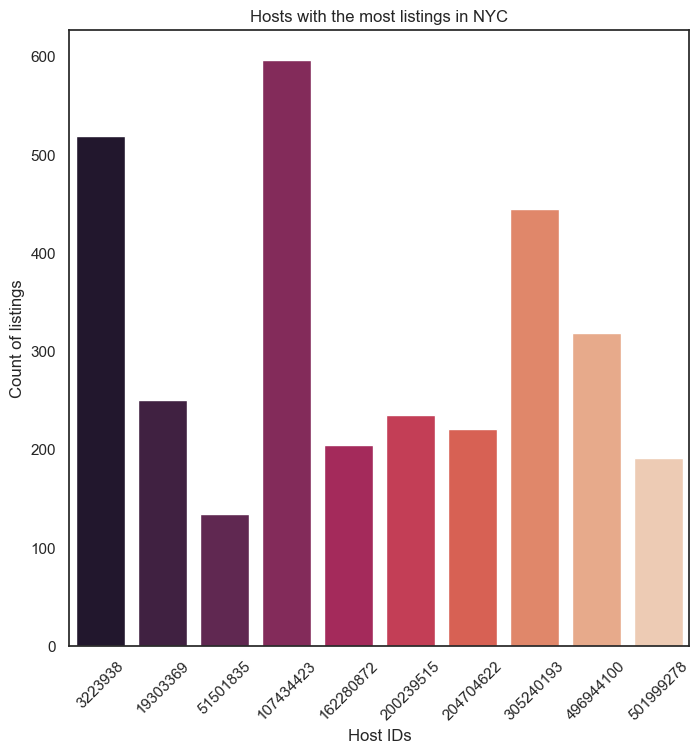

In [19]:
#plot these values
sns.set(rc={'figure.figsize':(8,8)})
sns.set_style('white')
fig1=sns.barplot(x=top_host_df["Host_ID"], y=top_host_df["Person_Count"], data=top_host_df, palette="rocket")
fig1.set_title('Hosts with the most listings in NYC')
fig1.set_ylabel('Count of listings')
fig1.set_xlabel('Host IDs')
fig1.set_xticklabels(fig1.get_xticklabels(), rotation=45)

In [20]:
#subprice list of all neighbourhood_groups

sub_1=df.loc[df['neighbourhood_group'] == 'Manhattan']
price_sub1=sub_1[['price']]

sub_2=df.loc[df['neighbourhood_group'] == 'Brooklyn']
price_sub2=sub_2[['price']]

sub_3=df.loc[df['neighbourhood_group'] == 'Queens']
price_sub3=sub_3[['price']]

sub_4=df.loc[df['neighbourhood_group'] == 'Staten Island']
price_sub4=sub_4[['price']]

sub_5=df.loc[df['neighbourhood_group'] == 'Bronx']
price_sub5=sub_5[['price']]
#putting all the prices' dfs in the list
price_by_neighbourhood=[price_sub1, price_sub2, price_sub3, price_sub4, price_sub5]

In [21]:
#price_by_neighbourhood

In [22]:
nei_gps=['Manhattan', 'Brooklyn', 'Queens', 'Staten Island', 'Bronx']
#get price statistics and trends accross several neighbourhoods
price_percents=[]
for i in price_by_neighbourhood:
    result=i.describe(percentiles=[.25, .50, .75])
    result=result.iloc[3:]
    result.reset_index(inplace=True)
    price_percents.append(result)
  
price_percents[0].rename(columns={'index':'Stats','price':nei_gps[0]}, inplace=True)
price_percents[1].rename(columns={'index':'Stats','price':nei_gps[1]}, inplace=True)
price_percents[2].rename(columns={'index':'Stats','price':nei_gps[2]}, inplace=True)
price_percents[3].rename(columns={'index':'Stats','price':nei_gps[3]}, inplace=True)
price_percents[4].rename(columns={'index':'Stats','price':nei_gps[4]}, inplace=True)
#Df   
price_df=price_percents
price_df=[df.set_index('Stats') for df in price_df]
price_df=price_df[0].join(price_df[1:])
price_df

,Manhattan,Brooklyn,Queens,Staten Island,Bronx
Stats,,,,,
min,0.0,10.0,10.00,20.0,10.0
25%,112.0,69.0,60.00,75.0,60.0
50%,180.0,115.0,95.00,102.0,90.0
75%,305.0,190.0,153.75,156.0,146.0
max,30000.0,25000.0,10000.00,1200.0,10000.0


Text(0.5, 1.0, 'Density and distribution of prices for each neighberhood_group')

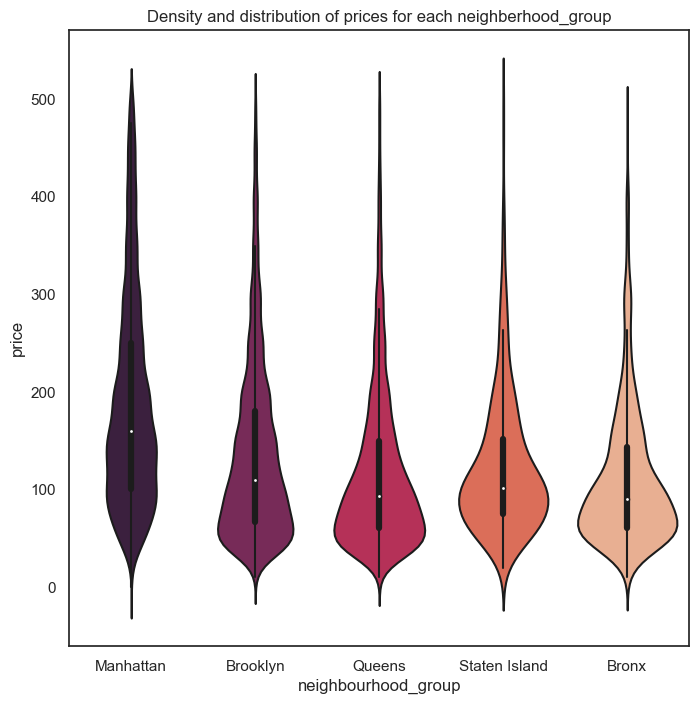

In [23]:
#the max prices have numbers like 30000 and 25000..etc so these have to be reoved if we're going to plot our price trends
sub_6=df[df.price < 500]
#univariate count and/or violin plots
fig2=sns.violinplot(data=sub_6, x=sub_6['neighbourhood_group'], y=sub_6['price'], palette="rocket")
fig2.set_title('Density and distribution of prices for each neighberhood_group')

#### Observations about prices across neighbourhood groups:
1) Manhattan has the highest range of prices with an average of about $150

2) Queens and Bronx have similar distributions

3) Queens and Bronx have the lowest average prices at about $90

4) Manhattan has the highest density at $500

5) Queens has the highest distribution at the cheapest price of about $50

In [24]:
#top 10 highest frequency neighbourhoods
df.neighbourhood.value_counts().head(10)

neighbourhood
Bedford-Stuyvesant    2727
Williamsburg          2304
Midtown               2000
Harlem                1838
Bushwick              1648
Hell's Kitchen        1562
Upper West Side       1504
Upper East Side       1494
Crown Heights         1232
East Village          1091
Name: count, dtype: int64

In [36]:
#graph neighbourhood, neighbourhood_groups and room_types 
nei_list = df.neighbourhood.value_counts().head(10).index
nei_list = nei_list.tolist()
nei_list

['Bedford-Stuyvesant',
 'Williamsburg',
 'Midtown',
 'Harlem',
 'Bushwick',
 "Hell's Kitchen",
 'Upper West Side',
 'Upper East Side',
 'Crown Heights',
 'East Village']

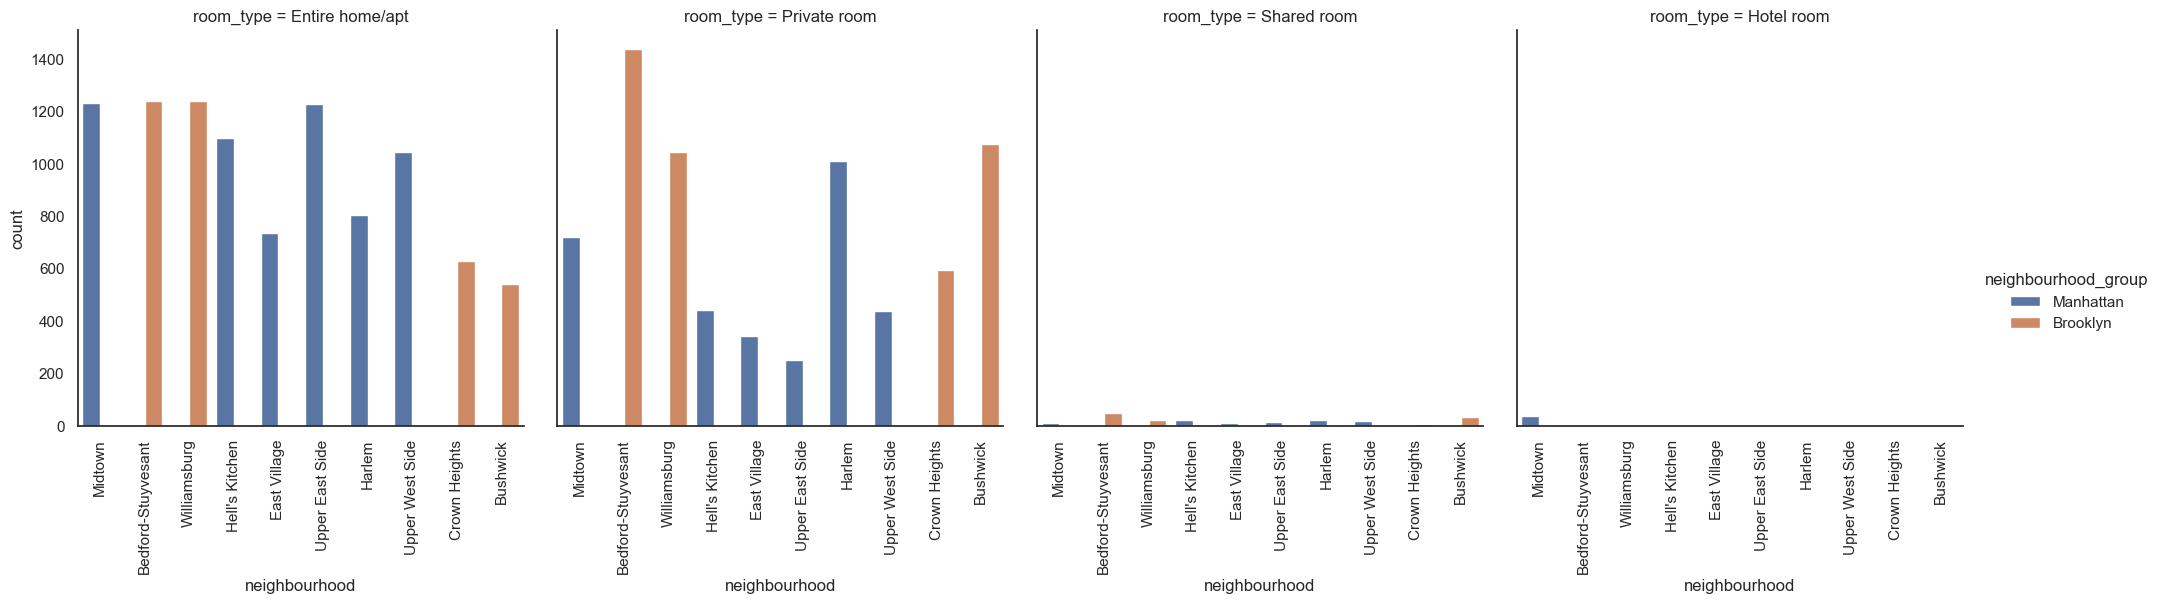

In [43]:
sub_7=df.loc[df['neighbourhood'].isin(nei_list)]
#multivariate analysis using catplot and count on the top 10 neighbourhoods
#double click to zoom into garphs
fig3=sns.catplot(x='neighbourhood', hue='neighbourhood_group', col='room_type', data=sub_7, kind='count')
fig3.set_xticklabels(rotation=90)

#### Observations about the top 10 neighbourhoods in each neighourhood_group with each room_type available to customers:
##### Entire home/apt 
1) In Manhattan, the highest number of apts is 1200 in Midtown and Upper East Side
2) In Brooklyn, the highest number of apts is 1200 in Bedford-Stuyvesant and Williamsburg
3) In Manhattan, the lowest number of apts is about 700 in East Village
4) In Brooklyn, the lowest number of apts is about 550 in Bushwick
##### Private room
1) The highest count at about 1000 exists in Harlem, Manhattan
2) The highest count at about 1400 exists in Bedford-Stuyvesant, Brooklyn
3) The lowest count at about 200 exists in Upper East Side, Manhattan
4) The lowest count at about 600 exists in Crown Heights, Brooklyn
##### Shared room
1) Harlem and Hell's Kitchen in Manhattan have the highest number <100
2) Bedford-Stuyvesant, Brooklyn has the highest count <100
##### Hotel room
1) The only neighbourhood and neighbourhood_group with hotel rooms is in Midtown, Manhattan <100

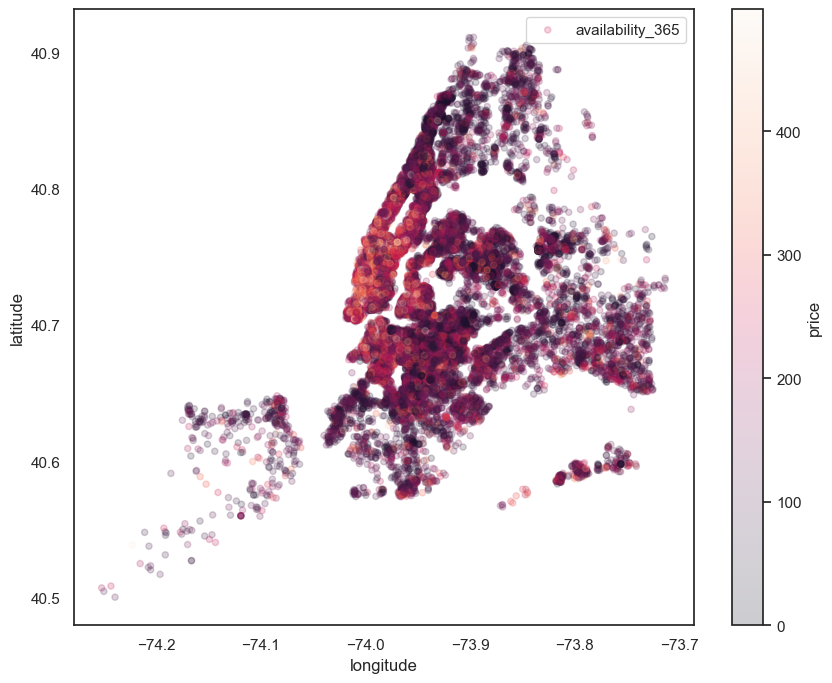

In [46]:
#longitude and latitiude to visualise on map for prices <500
fig4=sub_6.plot(kind='scatter', x='longitude', y='latitude', label='availability_365', c='price',
                  cmap=plt.get_cmap("rocket"), colorbar=True, alpha=0.2, figsize=(10,8))
fig4.legend()

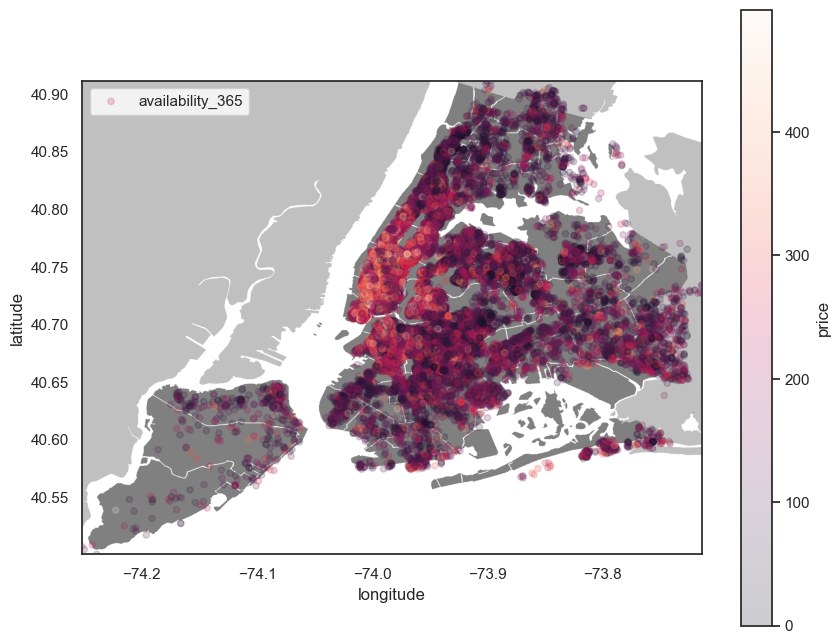

In [70]:
import urllib
import PIL
from PIL import Image
#initializing the figure size
plt.figure(figsize=(10,8))
#loading the png NYC image and saving it, new version requires passing to PIL
img_url = 'https://upload.wikimedia.org/wikipedia/commons/e/ec/Neighbourhoods_New_York_City_Map.PNG'
nyc_img=np.array(PIL.Image.open(urllib.request.urlopen(img_url)))
plt.imshow(nyc_img,zorder=0,extent=[df.longitude.min(), df.longitude.max(), df.latitude.min(), df.latitude.max()])
ax=plt.gca()
#using scatterplot again
sub_6.plot(kind='scatter', x='longitude', y='latitude', label='availability_365', c='price', ax=ax, 
           cmap=plt.get_cmap("rocket"), colorbar=True, alpha=0.2, zorder=5)

plt.legend()
plt.show()

In [78]:
###BELOW UNDER REVIEW

In [71]:
#initializing empty list where we are going to put our name strings
_names_=[]
#getting name strings from the column and appending it to the list
for name in df.name:
    _names_.append(name)
#setting a function that will split those name strings into separate words   
def split_name(name):
    spl=str(name).split()
    return spl
#initializing empty list where we are going to have words counted
_names_for_count_=[]
#getting name string from our list and using split function, later appending to list above
for x in _names_:
    for word in split_name(x):
        word=word.lower()
        _names_for_count_.append(word)

In [72]:
#we are going to use counter
from collections import Counter
#let's see top 25 used words by host to name their listing
_top_25_w=Counter(_names_for_count_).most_common()
_top_25_w=_top_25_w[0:25]

In [73]:
#now let's put our findings in dataframe for further visualizations
sub_w=pd.DataFrame(_top_25_w)
sub_w.rename(columns={0:'Words', 1:'Count'}, inplace=True)

[Text(0, 0, '·'),
 Text(1, 0, '1'),
 Text(2, 0, 'in'),
 Text(3, 0, 'bath'),
 Text(4, 0, 'rental'),
 Text(5, 0, 'unit'),
 Text(6, 0, 'bedroom'),
 Text(7, 0, 'bed'),
 Text(8, 0, '2'),
 Text(9, 0, 'york'),
 Text(10, 0, 'new'),
 Text(11, 0, 'beds'),
 Text(12, 0, 'brooklyn'),
 Text(13, 0, 'shared'),
 Text(14, 0, 'bedrooms'),
 Text(15, 0, 'baths'),
 Text(16, 0, '3'),
 Text(17, 0, 'queens'),
 Text(18, 0, '★5.0'),
 Text(19, 0, 'home'),
 Text(20, 0, 'studio'),
 Text(21, 0, 'private'),
 Text(22, 0, '4'),
 Text(23, 0, 'condo'),
 Text(24, 0, '1.5')]

E:\Downloads\ANACONDA3\lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 9733 (\N{BLACK STAR}) missing from current font.
  func(*args, **kwargs)
E:\Downloads\ANACONDA3\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 9733 (\N{BLACK STAR}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


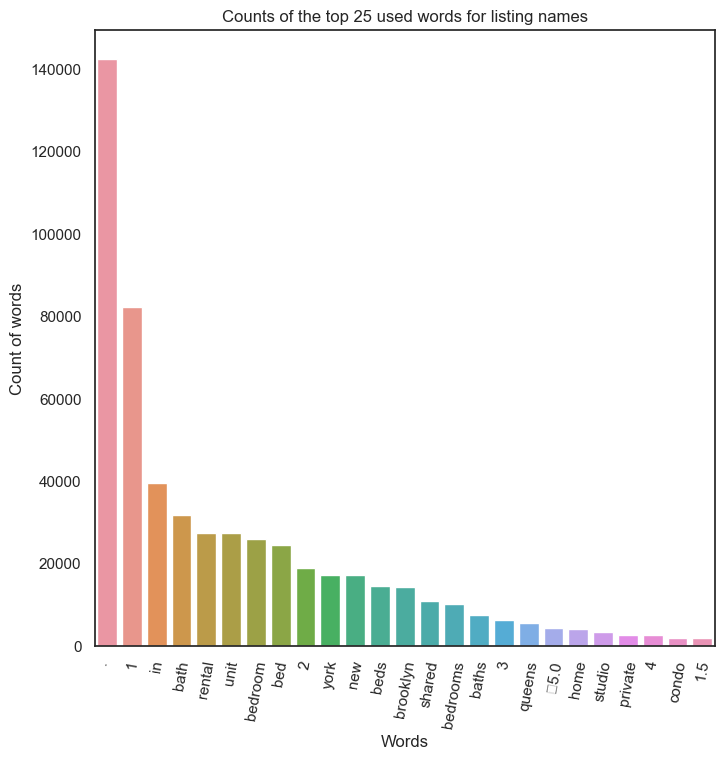

In [74]:
#we are going to use barplot for this visualization
fig5=sns.barplot(x='Words', y='Count', data=sub_w)
fig5.set_title('Counts of the top 25 used words for listing names')
fig5.set_ylabel('Count of words')
fig5.set_xlabel('Words')
fig5.set_xticklabels(fig5.get_xticklabels(), rotation=80)

In [76]:
#last column we need to look at is 'number_of_reviews'

#let's grab 10 most reviewed listings in NYC
top_reviewed_listings=df.nlargest(10,'number_of_reviews')
top_reviewed_listings

,name,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
16251,Boutique hotel in New York · ★4.54 · 1 bedroom...,266755066,Manhattan,East Village,40.723800,-73.99038,Private room,359,1,1834,39.55,4,297,449
21725,Hotel in New York · ★4.66 · 1 bedroom · 1 bed ...,397872858,Manhattan,Theater District,40.763600,-73.98473,Private room,386,1,1516,54.60,9,361,275
24935,Hotel in New York · ★4.43 · 1 bedroom · 1 bed ...,435369966,Manhattan,Financial District,40.710026,-74.01136,Private room,366,1,1498,79.82,6,260,637
21759,Hotel in New York · ★4.65 · 1 bedroom · 2 beds...,397872858,Manhattan,Theater District,40.761760,-73.98393,Private room,403,1,1120,40.38,9,363,218
16249,Boutique hotel in New York · ★4.41 · 1 bedroom...,266755066,Manhattan,Lower East Side,40.722590,-73.98841,Private room,351,1,1105,25.25,4,291,219
21762,Hotel in New York · ★4.70 · 1 bedroom · 1 bed ...,397872858,Manhattan,Theater District,40.761900,-73.98454,Private room,404,1,974,35.08,9,358,66
1046,Rental unit in Brooklyn · ★4.67 · 1 bedroom · ...,6642777,Brooklyn,Williamsburg,40.711650,-73.95236,Private room,121,1,793,6.37,2,30,91
2220,Rental unit in Brooklyn · ★4.66 · 1 bedroom · ...,6642777,Brooklyn,Williamsburg,40.710670,-73.95250,Private room,119,1,775,7.02,2,32,71
15148,Hotel in New York · ★4.59 · 1 bedroom · 1 bed ...,259169672,Manhattan,Midtown,40.746230,-73.98499,Hotel room,515,1,747,15.42,10,359,4
23031,Rental unit in New York · ★4.91 · 1 bedroom · ...,158969505,Manhattan,Lower East Side,40.723010,-73.99201,Entire home/apt,278,1,738,29.68,11,116,686


In [77]:
price_avrg=top_reviewed_listings.price.mean()
print('Average price per night: {}'.format(price_avrg))

Average price per night: 330.2


#### This helps decision makers learn about:
#### 1) The occurrence of prices
#### 2) How to price newly introduced rooms
#### 3) How to make newly priced rooms and property types more available
#### 4) They should also learn about the average prices of property types and rooms in different locations
#### 5) This is also helpful to understand analytics better and how to offer better deals to potential cutomers
#### 6) How to save company resources and costs by knowing which locations and prices to make more available 